In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [4]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analysis Missing Data

In [5]:
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


### Help of heatmap find null value

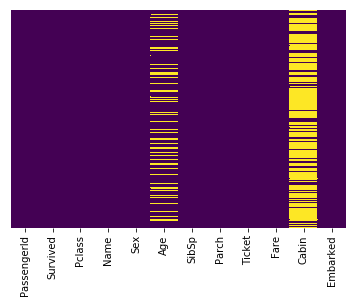

In [7]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Y tick labels is False because on Y-axis it display none Value
### cbar is also false not to display vertical colorbar


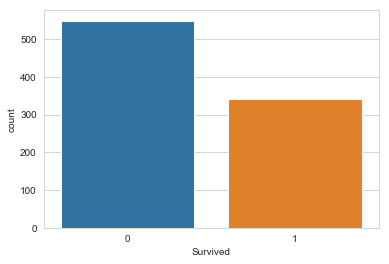

In [8]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',data=df)

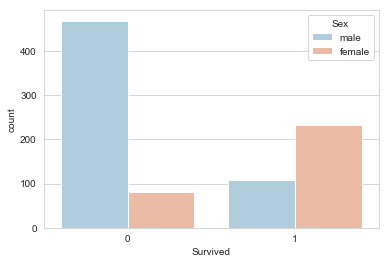

In [9]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

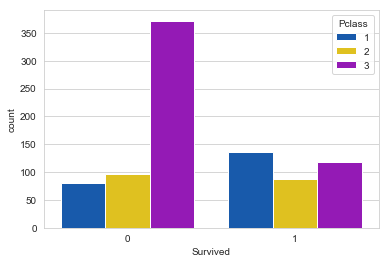

In [10]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Pclass',data=df,palette='prism')

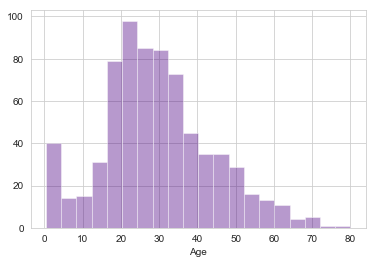

In [11]:
sn.distplot(df['Age'].dropna(),kde=False,color='indigo')

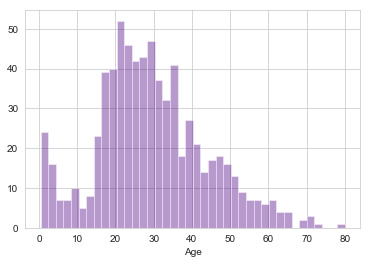

In [12]:
sn.distplot(df['Age'].dropna(),kde=False,color='indigo',bins=40)

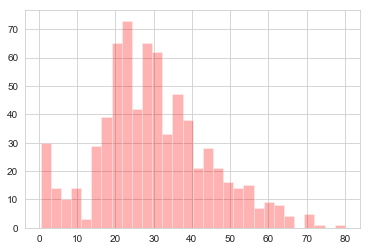

In [13]:
df['Age'].hist(bins=30,color='red',alpha=0.3)

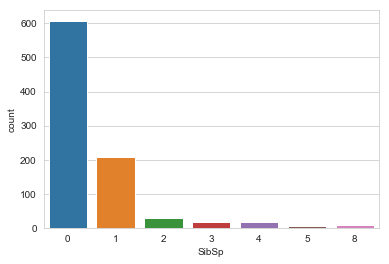

In [14]:
sn.countplot(x='SibSp',data=df)

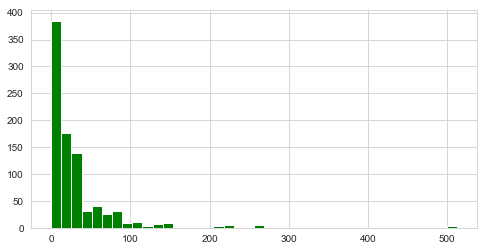

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(8,40))

### Data Cleaning

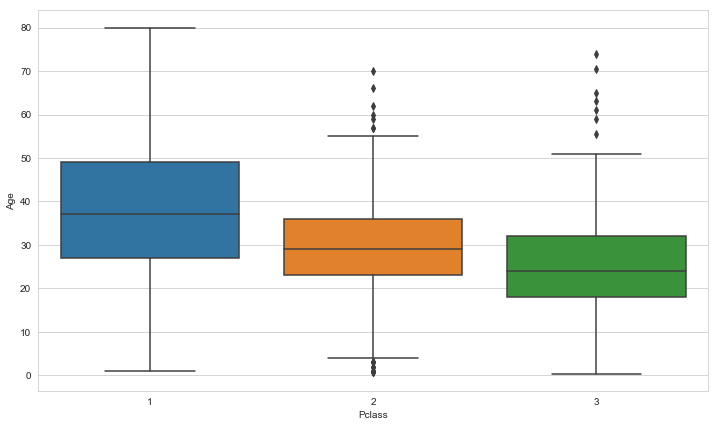

In [21]:
plt.figure(figsize=(12,7))
sn.boxplot(x='Pclass',y='Age',data=df)

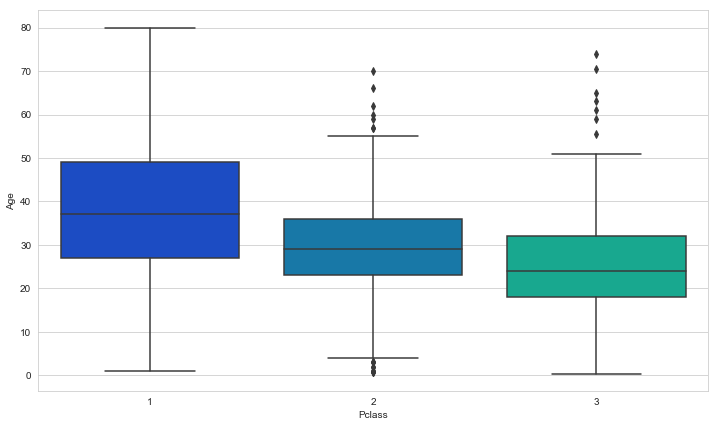

In [22]:
plt.figure(figsize=(12,7))
sn.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [25]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 28
        elif Pclass ==3:
            return 24
        
    else:
        return Age

In [26]:
df['Age']=df[['Age','Pclass']].apply(fill_age,axis=1)

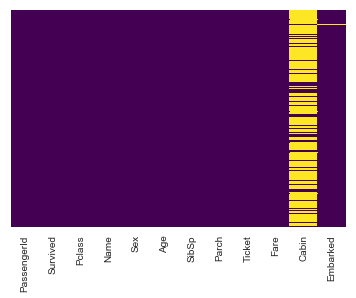

In [27]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df.drop('Cabin',axis=1,inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB
